# Download and processing of indexes data 

All indexes are downloaded from NOAA [Physical Sciences Laboratory](https://psl.noaa.gov/data/climateindices/list/). 

We choose to work -based on Hoyos et.al. 2018- with:

- Caribbean SST Index (CAR)
- North Tropical Atlantic SST Index (NTA)
- Tropical Northern Atlantic Index (TNA)
- East Central Tropical Pacific SST (Nino3.4)
- Eastern Tropical Pacific SST (Nino3)
- Southern Oscillation Index (SOI)

In [1]:
# libraries 
import numpy as np 
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Download data

In [2]:
car_url = "https://psl.noaa.gov/data/correlation/CAR_ersst.data"
nta_url = "https://psl.noaa.gov/data/correlation/NTA_ersst.data"
tna_url = "https://psl.noaa.gov/data/correlation/tna.data"
nino34_url = "https://psl.noaa.gov/data/correlation/nina34.anom.data"
nino3_url = "https://psl.noaa.gov/data/correlation/nina3.anom.data"
soi_url = "https://psl.noaa.gov/data/correlation/soi.data"

col_names = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

car_data = pd.read_csv(car_url, sep='\s+', header=None, skiprows=2, names=col_names, skipfooter=8, engine='python')
nta_data = pd.read_csv(nta_url, sep='\s+', header=None, skiprows=2, names=col_names, skipfooter=8, engine='python')
tna_data = pd.read_csv(tna_url, sep='\s+', header=None, skiprows=1, names=col_names, skipfooter=7, engine='python')
soi_data = pd.read_csv(soi_url, sep='\s+', header=None, skiprows=4, names=col_names, skipfooter=4, engine='python')
nino3_data = pd.read_csv(nino3_url, sep='\s+', header=None, skiprows=3, names=col_names, skipfooter=4, engine='python')
nino34_data = pd.read_csv(nino34_url, sep='\s+', header=None, skiprows=3, names=col_names, skipfooter=4, engine='python')


In [4]:
nino34_data.head()

,01,02,03,04,05,06,07,08,09,10,11,12
1950,-1.99,-1.69,-1.42,-1.54,-1.75,-1.27,-1.01,-0.97,-0.98,-1.03,-1.23,-1.31
1951,-1.30,-1.04,-0.38,-0.23,-0.01,0.00,0.30,0.17,0.51,0.49,0.55,0.31
1952,0.13,-0.01,-0.11,-0.02,-0.14,-0.54,-0.76,-0.56,-0.36,-0.46,-0.78,-0.39
1953,0.20,0.24,0.29,0.22,0.35,0.39,0.14,0.09,0.29,0.16,0.18,0.41
1954,0.43,0.28,-0.38,-1.17,-0.81,-0.93,-1.18,-1.43,-1.60,-1.48,-1.13,-1.33


In [4]:
def data_as_timeseries(data):
    start_date = pd.to_datetime(str(data.index[0])+'-'+data.columns[0]+'-01')
    final_date = pd.to_datetime(str(data.index[-1])+'-'+data.columns[-1]+'-01')

    dates = pd.date_range(start_date, final_date, freq='MS')

    dim = int(data.shape[0]*data.shape[1])
    array = data.to_numpy().reshape(dim)

    da = pd.DataFrame({'time':dates, 'anommaly':array}).set_index('time').to_xarray()

    return da

## Plot indexes time series

In [13]:
# Time series organized to plot

def get_indexes_timeseries(df):
    '''
    Transforms df to another df with two columns for date and anomaly
    '''
    
    start_date = pd.to_datetime(str(df.index[0])+'-'+df.columns[0]+'-01')
    final_date = pd.to_datetime(str(df.index[-1])+'-'+df.columns[-1]+'-01')

    dates = pd.date_range(start_date, final_date, freq='MS')
    array = df.to_numpy().flatten()

    nw_df = pd.DataFrame({'time':dates, 'anommaly':array}).set_index('time')

    # normalize to zero mean and unitary std
    nw_df['anommaly'] = (nw_df['anommaly'] - nw_df['anommaly'].mean())/nw_df['anommaly'].std()

    return nw_df

# function to plot indexes time series

def plot_index_timeseries(df, title, save_fig=False):
    # Change some of seaborn's style settings with `sns.set()`
    sns.set(
            style="ticks",                   # The 'ticks' style
            rc={"figure.figsize": (9, 6),      # width = 6, height = 9
                "figure.facecolor": "white",  # Figure colour
                "axes.facecolor": "white"})  # Axes colour# Box plot

    b = sns.lineplot(data = df, x='time', y='anommaly', color='gray')

    b.fill_between(df.index, 0, (df.anommaly > 0) * df.anommaly, color='peachpuff')
    b.fill_between(df.index, 0, (df.anommaly < 0) * df.anommaly, color='paleturquoise')

    b.set_xlabel("Time (months)", fontsize = 14)# Set the plot title with the pval variable and font size
    b.set_ylabel("°C", fontsize = 14)
    b.set_title("\n"+title, fontsize=16, weight='bold')

    # Remove axis spines
    sns.despine(offset = 5, trim = True)

    plt.tight_layout()

    if save_fig:
        fig = b.get_figure()
        fig.savefig("img-indexes-timeseries/"+title.replace(" ", "_")+".png")
    
    plt.show()

    return True

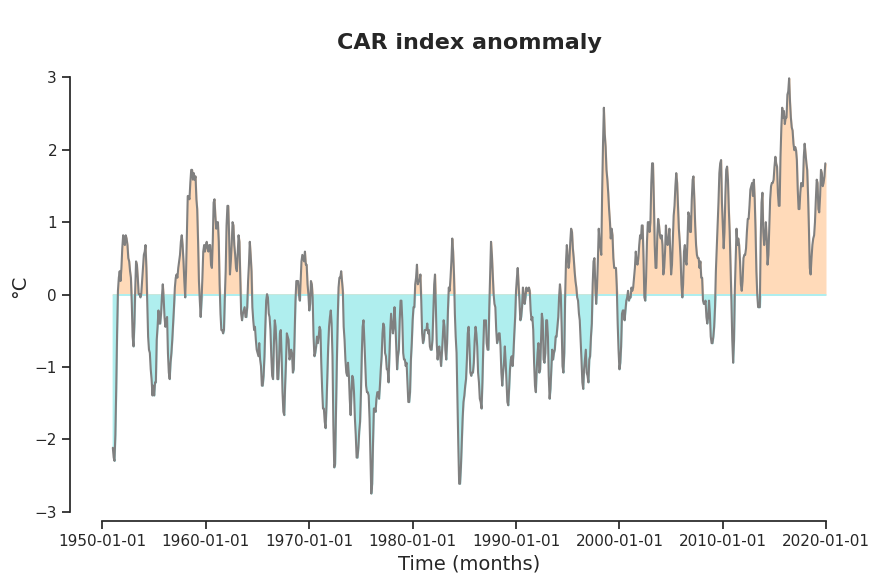

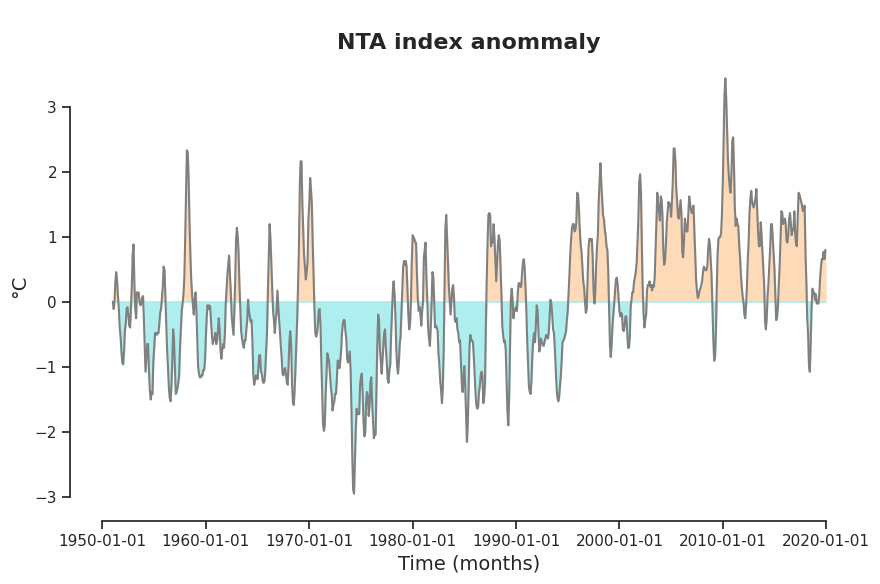

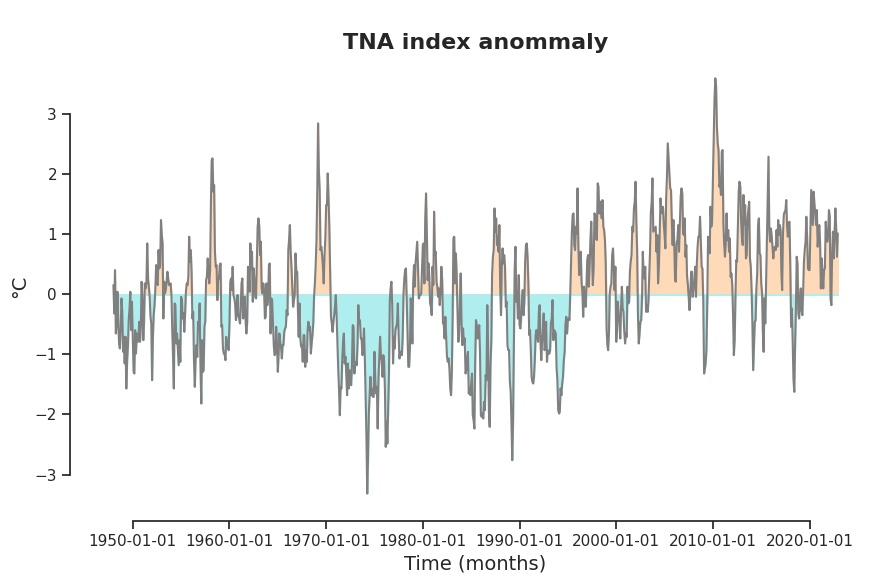

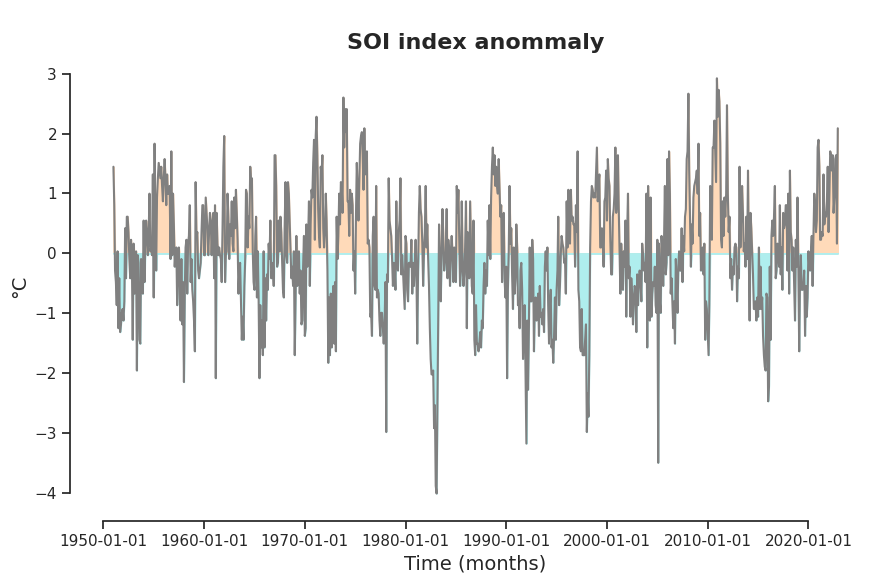

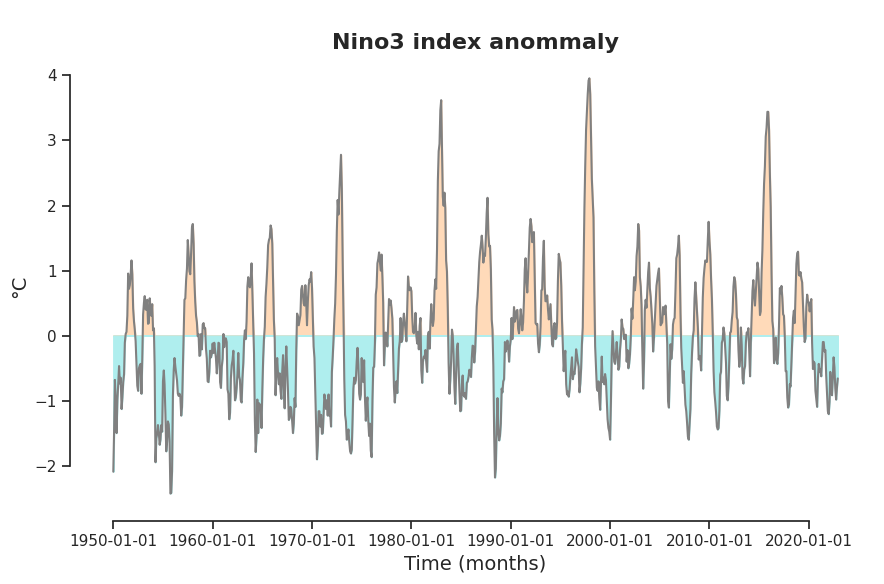

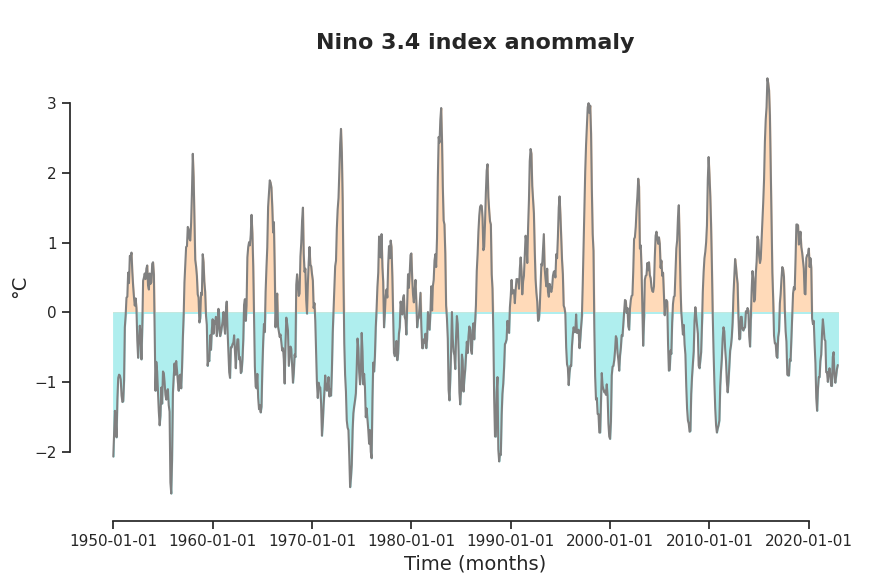

True

In [15]:
plot_index_timeseries(get_indexes_timeseries(car_data), 'CAR index anommaly', save_fig=True)
plot_index_timeseries(get_indexes_timeseries(nta_data), 'NTA index anommaly', save_fig=True)
plot_index_timeseries(get_indexes_timeseries(tna_data), 'TNA index anommaly', save_fig=True)
plot_index_timeseries(get_indexes_timeseries(soi_data), 'SOI index anommaly', save_fig=True)
plot_index_timeseries(get_indexes_timeseries(nino3_data), 'Nino3 index anommaly', save_fig=True)
plot_index_timeseries(get_indexes_timeseries(nino34_data), 'Nino 3.4 index anommaly', save_fig=True)

## Format as NetcdFile

export anomalies data as nc file for each index after normalization.

In [98]:
get_indexes_timeseries(car_data).to_xarray().to_netcdf('anomalies-timeseries/car_anomaly.nc')
get_indexes_timeseries(nino3_data).to_xarray().to_netcdf('anomalies-timeseries/nino3_anomaly.nc')
get_indexes_timeseries(nino34_data).to_xarray().to_netcdf('anomalies-timeseries/nino34_anomaly.nc')
get_indexes_timeseries(nta_data).to_xarray().to_netcdf('anomalies-timeseries/nta_anomaly.nc')
get_indexes_timeseries(tna_data).to_xarray().to_netcdf('anomalies-timeseries/tna_anomaly.nc')
get_indexes_timeseries(soi_data).to_xarray().to_netcdf('anomalies-timeseries/soi_anomaly.nc')